In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Mental Health and Lifestyle Habits Dataset
mental_df = pd.read_csv("MentalHealthandSleep.csv")

In [3]:
# Normaize Column Names
mental_df.columns = (mental_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[()]', '', regex=True))

# Standardize key names
mental_df = mental_df.rename(columns={'screen_time_per_day_hours': 'daily_screen_time_hours', 'happiness_score': 'happiness_index'})

In [4]:
# Only keeping columns that I need
mental_df = mental_df[['age','daily_screen_time_hours','sleep_hours','stress_level','happiness_index','mental_health_condition']]

In [5]:
# Segregate Column by Age Range
bins   = [17, 24, 34, 44, 54, 64, 74, 120]
labels = ["18-24","25-34","35-44","45-54","55-64","65-74","75+"]
mental_df['age_group'] = pd.cut(mental_df['age'], bins=bins, labels=labels, right=True)


In [6]:
# Drop any null values
mental_df = mental_df.dropna(subset=['age_group','daily_screen_time_hours','sleep_hours','stress_level','happiness_index', 'mental_health_condition'])

In [7]:
# Removes any outliers
mental_df = mental_df[(mental_df['daily_screen_time_hours'].between(0,24)) & (mental_df['sleep_hours'].between(0,16)) & (mental_df['happiness_index'].between(0,10))]

Data Visualization

/var/folders/_f/fmfry0h146q34wf_0v7085kh0000gn/T/ipykernel_47884/3929320059.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group', as_index=False)


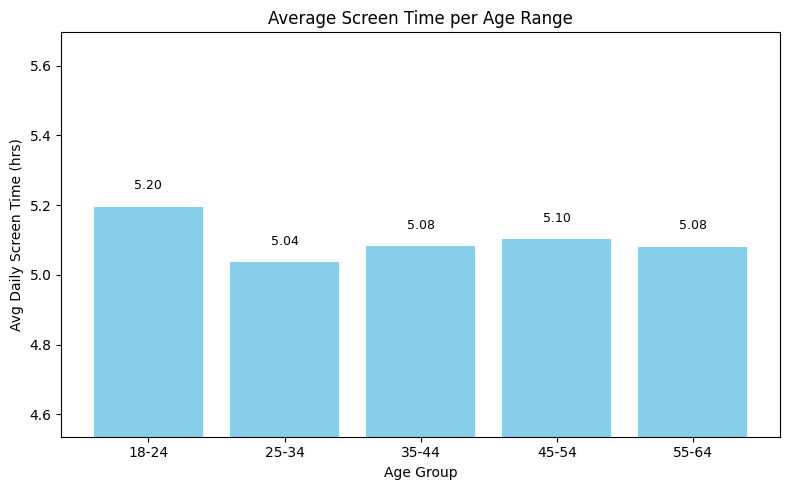

In [11]:
# Bar: average screen time per age range
agg = (mental_df
       .groupby('age_group', as_index=False)
       .agg(daily_screen_time_hours=('daily_screen_time_hours','mean')))

plt.figure(figsize=(8,5))
plt.bar(agg['age_group'], agg['daily_screen_time_hours'], color='skyblue')
plt.xlabel('Age Group'); plt.ylabel('Avg Daily Screen Time (hrs)')
plt.title('Average Screen Time per Age Range')
plt.ylim(agg['daily_screen_time_hours'].min()-0.5, agg['daily_screen_time_hours'].max()+0.5)  # tighter range
for i, v in enumerate(agg['daily_screen_time_hours']):
    plt.text(i, v+0.05, f"{v:.2f}", ha='center', fontsize=9)
plt.tight_layout(); plt.show()




/var/folders/_f/fmfry0h146q34wf_0v7085kh0000gn/T/ipykernel_47884/1676113272.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group', as_index=False)


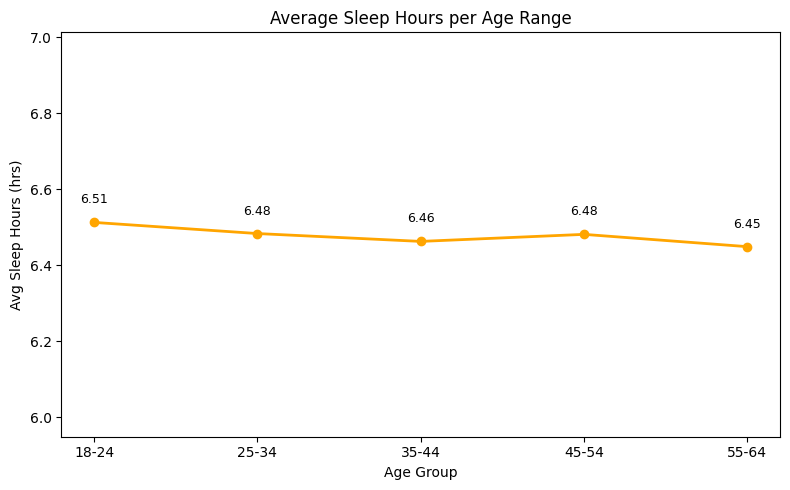

In [10]:
agg_sleep = (mental_df
             .groupby('age_group', as_index=False)
             .agg(sleep_hours=('sleep_hours','mean')))

plt.figure(figsize=(8,5))
plt.plot(agg_sleep['age_group'], agg_sleep['sleep_hours'], marker='o', color='orange', linewidth=2)
plt.xlabel('Age Group'); plt.ylabel('Avg Sleep Hours (hrs)')
plt.title('Average Sleep Hours per Age Range')
plt.ylim(agg_sleep['sleep_hours'].min()-0.5, agg_sleep['sleep_hours'].max()+0.5)
for x, y in zip(agg_sleep['age_group'], agg_sleep['sleep_hours']):
    plt.text(x, y+0.05, f"{y:.2f}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()



/var/folders/_f/fmfry0h146q34wf_0v7085kh0000gn/T/ipykernel_47884/4145345405.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_corr = (mental_df.groupby('age_group', as_index=False).agg(sleep_hours=('sleep_hours','mean'),happiness_index=('happiness_index','mean')))


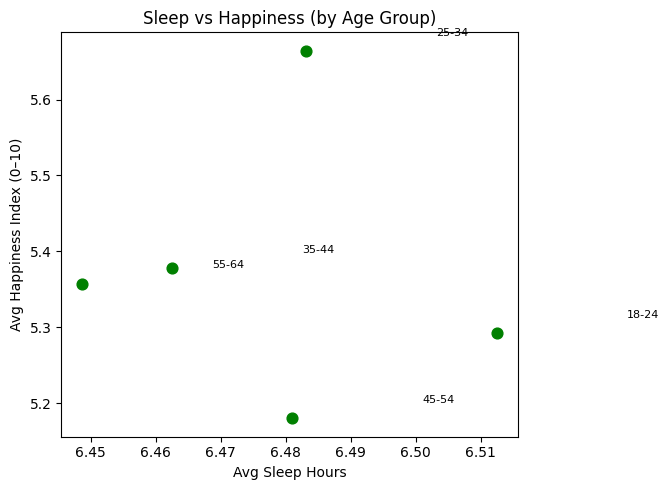

In [9]:
agg_corr = (mental_df.groupby('age_group', as_index=False).agg(sleep_hours=('sleep_hours','mean'),happiness_index=('happiness_index','mean')))

plt.figure(figsize=(7,5))
plt.scatter(agg_corr['sleep_hours'], agg_corr['happiness_index'], color='green', s=60)
for x, y, label in zip(agg_corr['sleep_hours'], agg_corr['happiness_index'], agg_corr['age_group']):
    plt.text(x+0.02, y+0.02, label, fontsize=8)
plt.xlabel('Avg Sleep Hours'); plt.ylabel('Avg Happiness Index (0–10)')
plt.title('Sleep vs Happiness (by Age Group)')
plt.tight_layout(); plt.show()


<Figure size 700x500 with 0 Axes>

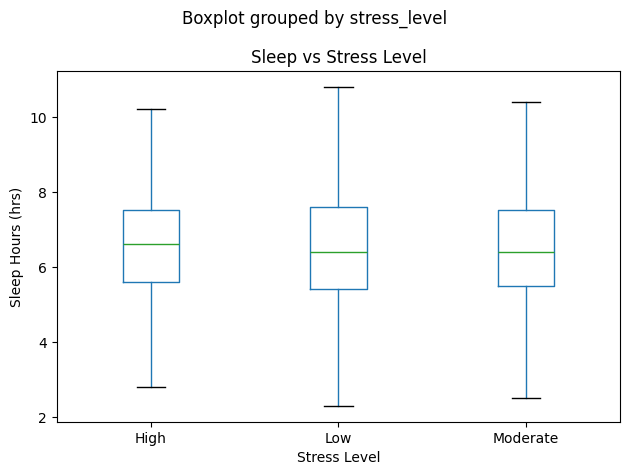

In [12]:
# Sleep vs Stress Level (boxplot)
dfb = mental_df.copy()
dfb['stress_level'] = dfb['stress_level'].str.title()

plt.figure(figsize=(7,5))
dfb.boxplot(column='sleep_hours', by='stress_level', grid=False, showfliers=False)
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours (hrs)')
plt.title('Sleep vs Stress Level')
plt.tight_layout()
plt.show()

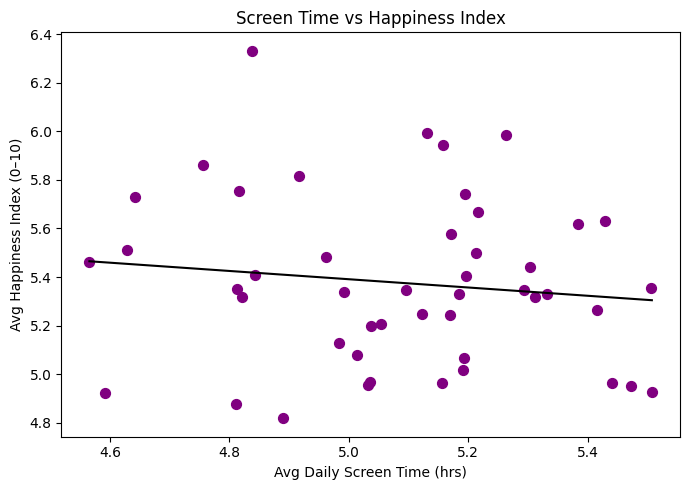

In [15]:
# Screen Time vs Happiness (scatter with trendline)
agg_corr2 = (mental_df.groupby('age', as_index=False)
             .agg(daily_screen_time_hours=('daily_screen_time_hours','mean'),
                  happiness_index=('happiness_index','mean')))

plt.figure(figsize=(7,5))
x, y = agg_corr2['daily_screen_time_hours'], agg_corr2['happiness_index']
plt.scatter(x, y, color='purple', s=50)

# added trendline
m, b = np.polyfit(x, y, 1)
xx = np.linspace(x.min(), x.max(), 100)
plt.plot(xx, m*xx+b, color='black')

plt.xlabel('Avg Daily Screen Time (hrs)')
plt.ylabel('Avg Happiness Index (0–10)')
plt.title('Screen Time vs Happiness Index')
plt.tight_layout()
plt.show()
